Calories Burnt Prediction Project

Step1: importing libraries

In [2]:
import numpy as np  #
import pandas as pd #used to make dataframes
import matplotlib.pyplot as plt #for creating plots
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics #used to evaluate our model

Time for Data Collection and Processing 

In [ ]:
#loading the dataframes. There are two datasets: calories and exercise. 

In [9]:
calories= pd.read_csv("C:/Users/nikitac1/Documents/calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [10]:
exercise=pd.read_csv("C:/Users/nikitac1/Documents/exercise.csv")
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#combine both dataframes. put calories column in the end of the second dataframe in a third dataframe. 

In [11]:
cals=pd.concat([exercise, calories['Calories']], axis=1) #axis 1=columns, 0=rows

In [13]:
cals.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#as u can see calories column has been added 

#let's see the shape of the dataframe using .shape

In [16]:
cals.shape

(15000, 9)

In [ ]:
#15000 rows(people) and 9 columns(features) 

Time to find out more information about our dataset.

In [18]:
cals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#as u can see no null values 

Data Analysis

In [19]:
cals.describe() #shows us all stat values of the features 

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
#heart rate and body temp of person is more when they are doing exercise

Data visualization

In [20]:
sns.set()

<AxesSubplot:xlabel='Gender', ylabel='count'>

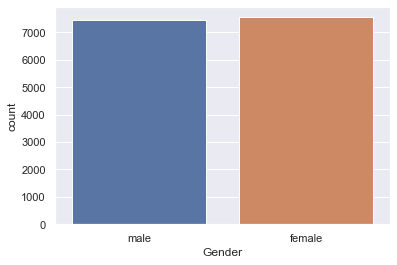

In [22]:
#using count plot to see distribution of gender
#count plots are very good for categorical labels
sns.countplot(cals['Gender'])

In [ ]:
#there is equal distribution between males and females.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

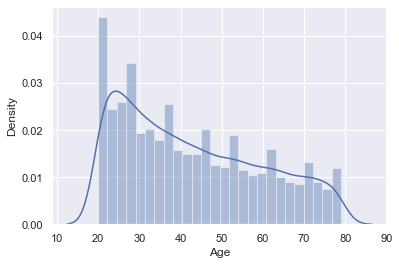

In [23]:
#age column distribution using distribution plot
sns.distplot(cals['Age'])

In [ ]:
#more values between 20 and 30, so young people. 
#younger people tend to workout more 
#no people below the age of 20

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

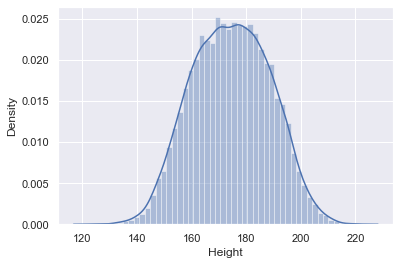

In [24]:
#checking distribution for height
sns.distplot(cals['Height'])

In [ ]:
#gaussian distribution/normal distribution for height

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

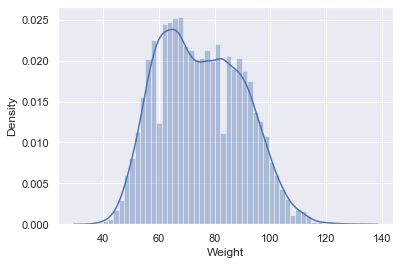

In [25]:
sns.distplot(cals['Weight'])

In [ ]:
# we see a lot of people near 6o and between 8- and 100

Find the correlation between features in the dataset
(positive correlation & negative correlation)
#proportional and inversely proportional

In [26]:
correlation=cals.corr()

<AxesSubplot:>

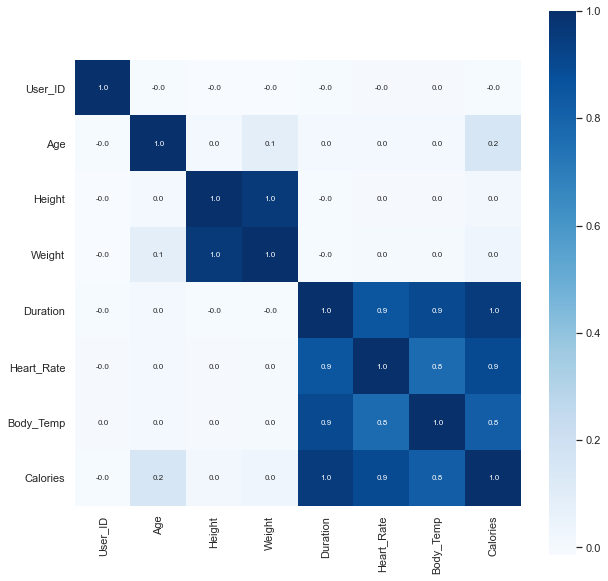

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#we can see how duration and heartrate are highly correlated to calories

In [ ]:
# we need to change values of gender column as it has categorical values.
#We need to convert it to numerical values
#categorical data enconding


In [31]:
cals.replace({"Gender":{'male':0, 'female': 1}}, inplace=True) #inplace=true means it will change in the dataframe and not just for this output

In [32]:
cals.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Time to seperate features from target variable

In [33]:
x=cals.drop(columns=['User_ID', 'Calories'], axis=1)
y=cals['Calories']

In [35]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

Splitting data into training and test Data

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [39]:
print(x.shape, y.shape, x_train.shape, x_test.shape)

(15000, 7) (15000,) (12000, 7) (3000, 7)


Model Training : XG Boost Regressor 

In [40]:
#loading the model 
model=XGBRegressor()

In [41]:
#time to train the model with X_train
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation of the model

Prediction on test data:

In [42]:
test_data_prediction=model.predict(x_test)

In [43]:
print(test_data_prediction)

[162.85588   51.1901   282.57092  ...  29.714382  14.268674 146.10014 ]


In [ ]:
#compare the values predicted by the model with original values

Mean Absolute Error

In [45]:
mae=metrics.mean_absolute_error(y_test, test_data_prediction)

In [46]:
mae #should be as low as possible

1.522782383730014

In [ ]:
#we need to evaluate for test and train both as for a good fitting model both values of test and train should be similar to cancel out overfitting 

In [51]:
training_dp=model.predict(x_train)
r2_train=metrics.r2_score(y_train, training_dp)
r2_train

0.999578168025246

In [55]:
r2_test=metrics.r2_score(y_test, test_data_prediction)
r2_test

0.9985883594697117

Predictive System: to predict the calories burt

In [59]:
input_data=(0,53,192.0,93.0,5.0,90.0,39.1) # take random from dataset

#change tuple input to a numpy array

input_nparray=np.asarray(input_data)

In [60]:
#reshape the array
input_data_reshaped=input_nparray.reshape(1,-1) 
#we need to reshape as otherwise model doesn't know that we are only putting for one particular data point

In [61]:
prediction=model.predict(input_data_reshaped)
prediction

array([24.394156], dtype=float32)

In [ ]:
#output is in form of list

In [62]:
print('The calories burnt are', prediction[0])

The calories burnt are 24.394156


Model predicts 24.39 and actual value is 25! So that's very close. Shows us that our model is performing well. 
